In [1]:
import pandas as pd
import re
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_excel('C:/Users/LG/Documents/빅숙타/NewsResult.xlsx')

In [3]:
df = data[['제목']]

In [4]:
df.head()

,제목
0,[사설] 코로나 대응체계 재정립 나선 정부
1,"일상회복, 건강하고 안전한 식품에서부터"
2,[이 주의 새 책] 이건 우리만의 비밀이지? 外
3,"[책꽂이] 코로나시대 인간의 뇌, 새 경험 자극이 필요하다"
4,"코로나가 일깨워준 만성질환 관리 필요성 가정의 달, 건강검진 추천항목은"


In [5]:
df['제목'] = df['제목'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힣]+',' ',x))

In [6]:
from konlpy.tag import Okt

In [7]:
document = df['제목']

In [8]:
okt = Okt()

In [9]:
document_noun_tk = []
for d in document:
    document_noun_tk.append(okt.nouns(d))

In [10]:
print(document_noun_tk)

[['사설', '코로나', '대응', '체계', '재정', '립', '나선', '정부'], ['일상', '회복', '식품'], ['이', '주의', '새', '책', '이건', '우리', '비밀'], ['책꽂이', '코로나', '시대', '인간', '뇌', '새', '경험', '자극'], ['코로나', '일', '준', '만성', '질환', '관리', '필요성', '가정', '달', '건강검진', '추천', '항목'], ['너', '유난', '사람', '사회학', '박사', '한마디'], ['확', '진자', '발생', '첫', '인정', '최', '중대', '비상', '사건'], ['이제', '안산', '이민', '국민', '힘', '안산시장', '후보', '확정'], ['홍성군', '치매', '애', '희망'], ['날', '추앙', '시대', '밈', '공정', '아우성'], ['생거', '진천', '농다리', '축제'], ['경제', '서영호', '디지털', '시대', '접'], ['뉴스', '앤', '이슈', '윤석열', '정부', '오늘', '추경', '편성', '첫', '국무회의', '개최'], ['책', '팬데믹', '브레인'], ['흥', '시민', '노래방', '이용', '객', '증가', '포착'], ['논산시', '비대', '의', '진료', '및', '처방', '지원', '시민', '일상', '회복'], ['현대', '캐피탈', '안전', '운전', '실천', '자동차', '리스', '렌트', '료', '월', '만원'], ['안착', '기', '진입', '시점', '논의', '방역', '사령탑', '누가', '결정'], ['팬데믹', '해', '총기', '사고', '사망자', '급증', '이유'], ['취임', '사', '정황', '농림부', '장관', '농업', '미래', '성장', '산업', '육성'], ['가족', '반려동물', '가슴', '통증', '분', '심리학'], ['리테일', '위드', '코로나', '타고', '쾌속',

In [12]:
document_noun_tk2 = []
for d in document_noun_tk:
    item = [i for i in d if len(i) > 1]
    document_noun_tk2.append(item)

In [13]:
print(document_noun_tk2)

[['사설', '코로나', '대응', '체계', '재정', '나선', '정부'], ['일상', '회복', '식품'], ['주의', '이건', '우리', '비밀'], ['책꽂이', '코로나', '시대', '인간', '경험', '자극'], ['코로나', '만성', '질환', '관리', '필요성', '가정', '건강검진', '추천', '항목'], ['유난', '사람', '사회학', '박사', '한마디'], ['진자', '발생', '인정', '중대', '비상', '사건'], ['이제', '안산', '이민', '국민', '안산시장', '후보', '확정'], ['홍성군', '치매', '희망'], ['추앙', '시대', '공정', '아우성'], ['생거', '진천', '농다리', '축제'], ['경제', '서영호', '디지털', '시대'], ['뉴스', '이슈', '윤석열', '정부', '오늘', '추경', '편성', '국무회의', '개최'], ['팬데믹', '브레인'], ['시민', '노래방', '이용', '증가', '포착'], ['논산시', '비대', '진료', '처방', '지원', '시민', '일상', '회복'], ['현대', '캐피탈', '안전', '운전', '실천', '자동차', '리스', '렌트', '만원'], ['안착', '진입', '시점', '논의', '방역', '사령탑', '누가', '결정'], ['팬데믹', '총기', '사고', '사망자', '급증', '이유'], ['취임', '정황', '농림부', '장관', '농업', '미래', '성장', '산업', '육성'], ['가족', '반려동물', '가슴', '통증', '심리학'], ['리테일', '위드', '코로나', '타고', '쾌속', '질주'], ['코로나', '위기', '기회', '채용', '플랫폼', '전성기', '승승장구'], ['수요', '동물원', '식인상어', '시대', '식인', '악어', '세상'], ['일상', '수학', '산업', '수학', '코로나', '확산', '중환자', '예측'],

In [14]:
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [15]:
import gensim
import gensim.corpora as corpora

In [16]:
dictionary = corpora.Dictionary(document_noun_tk2)
corpus = [dictionary.doc2bow(word) for word in document_noun_tk2]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [17]:
print(dictionary[3])

재정


In [18]:
len(dictionary)

3476

In [19]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [22]:
coherence_values = []

for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel, texts=document_noun_tk2, dictionary=dictionary)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

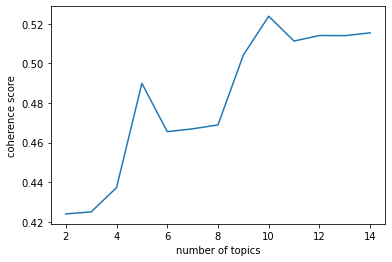

In [23]:
plt.plot(range(2,15), coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [24]:
#토픽 개수
k = 10

In [25]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = k, id2word=dictionary, passes=5)

In [26]:
topics = ldamodel.print_topics(num_words=3)
for topic in topics:
    print(topic)

(0, '0.032*"코로나" + 0.008*"시대" + 0.008*"서비스"')
(1, '0.051*"일상" + 0.045*"회복" + 0.011*"영업"')
(2, '0.008*"항공" + 0.007*"디지털" + 0.006*"소통"')
(3, '0.020*"미래" + 0.007*"교육" + 0.006*"경기"')
(4, '0.036*"거리" + 0.036*"두기" + 0.014*"일상"')
(5, '0.011*"시간" + 0.009*"정부" + 0.009*"코로나"')
(6, '0.013*"팬데믹" + 0.012*"일상" + 0.006*"도전"')
(7, '0.013*"격리" + 0.011*"일상" + 0.011*"진자"')
(8, '0.054*"코로나" + 0.016*"감염병" + 0.015*"해제"')
(9, '0.012*"교육" + 0.010*"축제" + 0.009*"학교"')


In [27]:
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=a78b70fe6f9e9e641f08083cea9d498c7d84fbbf78aaee9c25e0a0ea71661e5c
  Stored in directory: c:\users\lg\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=1d9521b6768fc79f9396eeff704a5c7967d59e21b0cd322df7cfdacf27169b93
  Stored in directory: c:\users\lg\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built

In [28]:
import pyLDAvis.gensim_models

In [29]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [30]:
pyLDAvis.save_html(vis, 'topic.html')

In [31]:
doc_per_topic_list = []

for n in range(len(corpus)):
    doc_topic = ldamodel[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])

In [32]:
doc_per_topic_list[:5]

[[0, 8, 0.88748103],
 [1, 1, 0.77496016],
 [2, 9, 0.81995845],
 [3, 0, 0.8713911],
 [4, 1, 0.9099629]]

In [33]:
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])
doc_topic_df = doc_topic_df.join(document)
doc_topic_df.head()

,Doc_Num,Topic,Percentage,제목
0,0,8,0.887481,사설 코로나 대응체계 재정립 나선 정부
1,1,1,0.774960,일상회복 건강하고 안전한 식품에서부터
2,2,9,0.819958,이 주의 새 책 이건 우리만의 비밀이지
3,3,0,0.871391,책꽂이 코로나시대 인간의 뇌 새 경험 자극이 필요하다
4,4,1,0.909963,코로나가 일깨워준 만성질환 관리 필요성 가정의 달 건강검진 추천항목은


1번: '코로나', '감염병', '해제', '등급'이라는 키워드를 통해 코로나가 감염병 등급이 낮아져 거리두기 해제했다는 내용의 뉴스라고 예측할 수 있음 (람다 1)
2번: '회복', '일상', '영업', '모임'이라는 키워드를 통해 일상이 회복되어 정상적인 영업이 가능해졌고 사적 모임이 가능하다는 내용의 뉴스라고 예측할 수 있음 (람다 0.5)
3번: '거리', '두기', '일상', '확진', '해제'라는 키워드를 통해 코로나 확진자 수가 이전보다 감소해 거리두기가 해제되고 일상으로 돌아온다는 내용의 뉴스라고 예측할 수 있음 (람다 1)
4번: '축제', '교육', '학교', '지역'이라는 키워드를 통해 지역 축제를 개최하고 학교에서 정상적으로 교육을 진행한다는 내용의 뉴스라고 예측할 수 있다. (람다 0.7)
5번: '팬데믹', '일상', '도전'이라는 키워드를 통해 팬데믹 이후 새로운 일상에 도전하고 있는 사람들과 관련된 뉴스라고 예측할 수 있다. (람다 1)
6번: '시간', '업자', '자영', '정부'라는 키워드를 통해 정부가 시간 제약을 풀어주며 자영업자들이 일상 회복을 하고 있다는 뉴스라고 예측할 수 있다. (람다 0.7)
7번: '미래', '백신', '민심', 주변'이라는 키워드를 통해 뭘도출할수있을까요.. (람다 0.5)
8번: '항공', '디지털', '소통', '코로나'라는 키워드를 통해 코로나 이후 디지털 소통이 증가했고 일상이 회복되면서 항공도 회복될 것이라는 뉴스라고 예측할 수 있다. (람다 1)
9번: '코로나', '시대', '서비스', '마스크'라는 키워드를 통해 코로나 시대에 서비스직의 마스크 착용과 관련된 뉴스라고 예측할 수 있다. (람다 1)
10번: '격리', '진자', '해외', '논의'라는 키워드를 통해 일상이 회복되면서 해외 출입자와 격리자, 확진자에 대해 논의하고 있다는 뉴스라고 에측할 수 있다. (람다 0.7)